<center>
<h1>Biomed Challenge Starting Kit</h1>
<br>This code was tested with <br>
Python 3.4.5 | Anaconda 2.2.0 64-bit (https://anaconda.org/)<br>
</center>
<p><br>
<div style="background:#FFFFAA"> TEST WITH PYTHON 2.7</div>

<div style="background:#FFFFAA">
Keep this.
</div>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE.

# Introduction

Opioids is a small standard binary-class classification data set from the <a href="https://www.kaggle.com/apryor6/us-opiate-prescriptions">Kaggle Dataset Repository</a>, formatted in the AutoML format.

In [1]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()

# Step 1: Exploratory data analysis
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the opioid_prescribers dataset from the repository.

In [2]:
datadir = 'sample_data'              # Change this to the directory where you put the input data
dataname = 'Opioids'
!dir $datadir*

/bin/sh: dir: command not found


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [3]:
from data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname) 

Reading sample_data/Opioids_train from AutoML format
Number of examples = 20
Number of features = 244
Number of labels = 1


In [4]:
data.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Target
0,0.0,10.0,1.0,5.0,0.0,0.0,0.0,0.0,17.0,35.0,...,0.0,0.0,0.0,63.0,0.0,0.0,0.0,30.0,NaN,1.0
1,1.0,32.0,1.0,5.0,0.0,0.0,11.0,11.0,0.0,14.0,...,0.0,0.0,0.0,24.0,0.0,0.0,0.0,11.0,NaN,1.0
2,1.0,40.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,0.0,23.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0
4,1.0,2.0,1.0,3.0,0.0,0.0,26.0,0.0,22.0,13.0,...,0.0,12.0,0.0,29.0,0.0,0.0,0.0,11.0,NaN,1.0


In [5]:
data.describe() 

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Target
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,...,20.0,20.000000,20.0,20.000000,20.0,20.0,20.000000,20.000000,0.0,20.000000
mean,0.600000,18.500000,84.200000,7.150000,3.050000,0.0,1.850000,0.550000,5.150000,6.150000,...,0.0,0.600000,0.0,15.700000,0.0,0.0,1.500000,4.850000,NaN,0.600000
std,0.502625,12.787741,176.630629,5.940716,13.640015,0.0,6.192313,2.459675,9.680556,12.300086,...,0.0,2.683282,0.0,24.535903,0.0,0.0,6.708204,11.913173,NaN,0.502625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,NaN,0.000000
25%,0.000000,10.750000,1.750000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,NaN,0.000000
50%,1.000000,14.500000,2.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,NaN,1.000000
75%,1.000000,26.750000,49.000000,8.750000,0.000000,0.0,0.000000,0.000000,3.750000,3.250000,...,0.0,0.000000,0.0,25.250000,0.0,0.0,0.000000,0.000000,NaN,1.000000
max,1.000000,44.000000,723.000000,21.000000,61.000000,0.0,26.000000,11.000000,32.000000,40.000000,...,0.0,12.000000,0.0,67.000000,0.0,0.0,30.000000,45.000000,NaN,1.000000


<div style="background:#FFFFAA">
Provide meaningful graphics, not just the default provided in the Iris example
</div>

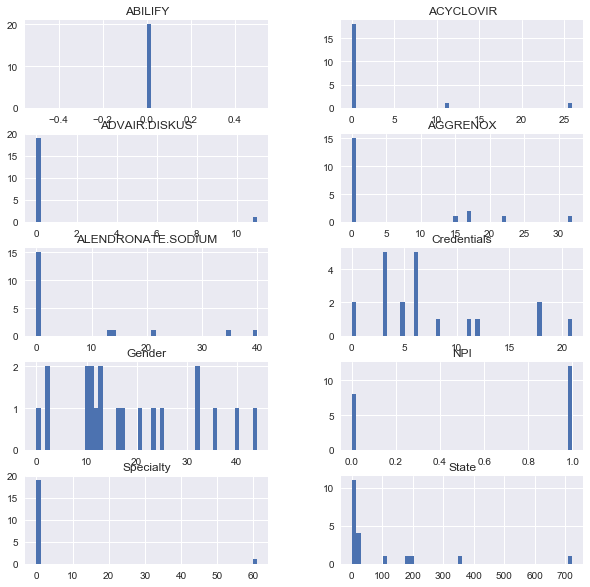

In [6]:
data[data.columns[:10]].hist(figsize=(10, 10), bins=50, layout=(5, 2)); 

In [7]:
#import numpy as np
#cols = data.columns[:10]
#sns.pairplot(data[np.append(cols,"Opioid.Prescriber")], hue="Opioid.Prescriber")

# Step 2: Building a predictive model

## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:
<div style="background:#FFFFAA"> Add INFO file </div>

In [8]:
from data_manager import DataManager  
D = DataManager(dataname, datadir, replace_missing=True)
print D

Info file NOT found : /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2018/M2_AIC/2.starting_kit/biomed_twoclass/Starting_Kit/sample_data/Opioids_public.info
DataManager : Opioids
info:
	task = regression
	valid_num = 20
	has_categorical = 0
	feat_type = Mixed
	format = dense
	metric = r2_metric
	target_type = Numerical
	test_num = 20
	label_num = 0
	target_num = 1
	train_num = 20
	has_missing = 0
	usage = No Info File
	feat_num = 243
	time_budget = 600
	is_sparse = 0
	name = Opioids
data:
	X_train = array(20, 243)
	Y_train = array(20,)
	X_valid = array(20, 243)
	X_test = array(20, 243)
feat_type:	array(243,)
feat_idx:	array(0,)



## Training a predictive model
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.

In [9]:
from model import model
??model 

Create an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:

In [10]:
M = model()
trained_model_name = model_dir + dataname
M = M.load(trained_model_name)                  # Attempts to re-load an already trained model

Model reloaded from: sample_code_submission/Opioids_model.pickle


Train and run your predictive model. If you have saved a trained model in sample_code_submission, the evaluation script will reload it and not retrain, just test. This will happen the second time you run the code because when the model is trained it gets saved. So delete iris_model.pickle from sample_code_submission if you do not want this to happen.

In [11]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
if not(M.is_trained):    
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

PREDICT: dim(X)= [20, 243]
PREDICT: dim(y)= [20, 1]
PREDICT: dim(X)= [20, 243]
PREDICT: dim(y)= [20, 1]
PREDICT: dim(X)= [20, 243]
PREDICT: dim(y)= [20, 1]


Save the trained model (will be ready to reload next time around) and save the prediction results:

In [12]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + dataname
from data_io import write
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/Opioids_test.predict
sample_result_submission/Opioids_train.predict
sample_result_submission/Opioids_valid.predict


## Scoring the results
### Load the challenge metric
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. We use here the `mse_metric` metric (an example of organizer-supplied metric found in `my_metric.py`), which computes the mean-square-error. You may change that in the "metric.txt" file to e.g. use `bac_multiclass`, one of the AutoML challenge metrics found in `libscores.py`, which is 2*(balanced_accuracy)-1.
<div style="background:#FFFFAA"> I changed your metric, keep this unless you have a good reason not to.</div>

In [13]:
import my_metric

In [14]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
scoring_function = getattr(my_metric, metric_name)
print('Using scoring metric:', metric_name)
??scoring_function

('Using scoring metric:', 'auc_metric_')


### Training performance
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [15]:
Y_hat_train.shape

(20,)

In [16]:
print 'Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train)
print 'Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train)

Training score for the auc_metric_ metric = 0.9792
Ideal score for the auc_metric_ metric = 1.0000


### Other metrics
<div style="background:#FFFFAA"> I recommend to generally use `predict_proba` to get numeric predictions between 0 an 1. However, to compute the two metrics below, you need first to threshold them. </div>

In [17]:
y_hat_train = 1*(Y_hat_train>0.5)   # This turns the outputs to binary predictions 0/1
# Compute accuracy and confusion matrix:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print 'Training accuracy = %5.4f' % accuracy_score(Y_train, y_hat_train)
print 'Confusion matrix [known in lines, predicted in columns]=\n',confusion_matrix(Y_train, y_hat_train)

Training accuracy = 0.9500
Confusion matrix [known in lines, predicted in columns]=
[[ 8  0]
 [ 1 11]]


### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development.

In [18]:
from sklearn.model_selection import KFold
from numpy import zeros, mean
# 3-fold cross-validation
n = 3
kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
i=0
scores = zeros(n)
for train_index, test_index in kf.split(X_train):
    Xtr, Xva = X_train[train_index], X_train[test_index]
    Ytr, Yva = Y_train[train_index], Y_train[test_index]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print ('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print ('Average score = ', mean(scores))

FIT: dim(X)= [13, 243]
FIT: dim(y)= [13, 1]
PREDICT: dim(X)= [7, 243]
PREDICT: dim(y)= [7, 1]
('Fold', 1, 'example metric = ', -0.19999999999999996)
FIT: dim(X)= [13, 243]
FIT: dim(y)= [13, 1]
PREDICT: dim(X)= [7, 243]
PREDICT: dim(y)= [7, 1]
('Fold', 2, 'example metric = ', -0.08333333333333337)
FIT: dim(X)= [14, 243]
FIT: dim(y)= [14, 1]
PREDICT: dim(X)= [6, 243]
PREDICT: dim(y)= [6, 1]
('Fold', 3, 'example metric = ', 0.75)
('Average score = ', 0.15555555555555556)


# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [19]:
outdir = 'sample_result_submission'     

In [20]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

Using input_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2018/M2_AIC/2.starting_kit/biomed_twoclass/Starting_Kit/sample_data
Using output_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2018/M2_AIC/2.starting_kit/biomed_twoclass/Starting_Kit/sample_result_submission
Using program_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2018/M2_AIC/2.starting_kit/biomed_twoclass/Starting_Kit/ingestion_program
Using submission_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2018/M2_AIC/2.starting_kit/biomed_twoclass/Starting_Kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Opioids ********
************************************************
========= Reading and converting data ==========
Info file NOT found : /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2

## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.